# Data cleaning and exploration using William Koehrsen's approach

In [1]:
import pandas as pd
import numpy as np
import os

raw_data_path = os.path.join(os.path.pardir,'data','raw')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

# import raw test and train data
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [3]:
test_df['Survived'] = -888
df = pd.concat((train_df, test_df), axis=0)

In [4]:
df.Embarked.fillna('S',inplace=True)

In [5]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'),'Fare'].median()
df.Fare.fillna(median_fare,inplace=True)

## Data Visualisation

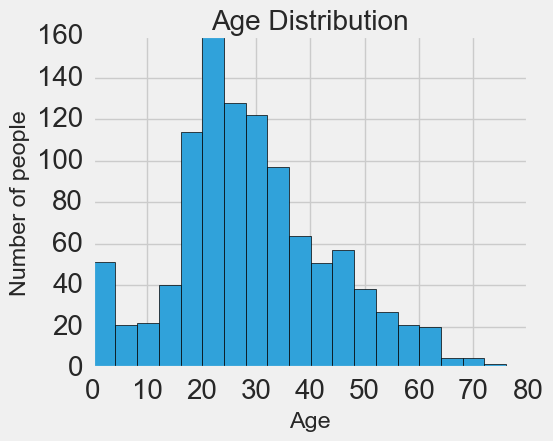

In [7]:
# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 5

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

figsize(5, 4)

# Histogram of the Age
plt.style.use('fivethirtyeight')
plt.hist(df['Age'].dropna(), bins = 20, edgecolor = 'k');
plt.xlabel('Age'); plt.ylabel('Number of people'); 
plt.title('Age Distribution');

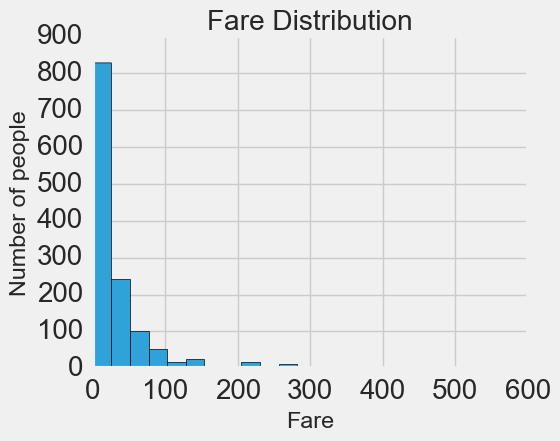

In [8]:
# Histogram of Fare
plt.style.use('fivethirtyeight')
plt.hist(df['Fare'].dropna(), bins = 20, edgecolor = 'k');
plt.xlabel('Fare'); plt.ylabel('Number of people'); 
plt.title('Fare Distribution');

In [9]:
df['Fare'].describe()

count    1309.000000
mean       33.276193
std        51.743584
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [107]:
# ten largest values
train_df['Fare'].dropna().sort_values().tail(10)

PassengerId
300    247.5208
743    262.3750
312    262.3750
28     263.0000
89     263.0000
439    263.0000
342    263.0000
738    512.3292
259    512.3292
680    512.3292
Name: Fare, dtype: float64

In [108]:
# display rows with max fare
train_df.loc[train_df['Fare'] == 512.3292, :]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [109]:
# find if there other passengers with the same surname
train_df[train_df['Name'].str.contains("Cardeza")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [10]:
# create a new column with surname
df['Surname'] = df.Name.map(lambda x: x.split(',')[0])

In [11]:
# find all cabin's with more than 4 chars and sort by surname
df[df['Cabin'].str.len() > 4].sort_values(by=['Surname'])

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Surname
PassengerId,,,,,,,,,,,,
949,25.00,F G63,S,7.6500,"Abelseth, Mr. Olaus Jorgensen",0,3,male,0,-888,348122,Abelseth
1198,30.00,C22 C26,S,151.5500,"Allison, Mr. Hudson Joshua Creighton",2,1,male,1,-888,113781,Allison
298,2.00,C22 C26,S,151.5500,"Allison, Miss. Helen Loraine",2,1,female,1,0,113781,Allison
306,0.92,C22 C26,S,151.5500,"Allison, Master. Hudson Trevor",2,1,male,1,1,113781,Allison
499,25.00,C22 C26,S,151.5500,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",2,1,female,1,0,113781,Allison
1094,47.00,C62 C64,C,227.5250,"Astor, Col. John Jacob",0,1,male,1,-888,PC 17757,Astor
701,18.00,C62 C64,C,227.5250,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",0,1,female,1,1,PC 17757,Astor
119,24.00,B58 B60,C,247.5208,"Baxter, Mr. Quigg Edmond",1,1,male,0,0,PC 17558,Baxter
300,50.00,B58 B60,C,247.5208,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",1,1,female,0,1,PC 17558,Baxter


In [12]:
# find all 'F' cabin and sort by Surname
df[df['Cabin'].str.contains("F",na=False, )].sort_values(by=['Surname'])

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Surname
PassengerId,,,,,,,,,,,,
949,25.0,F G63,S,7.6500,"Abelseth, Mr. Olaus Jorgensen",0,3,male,0,-888,348122,Abelseth
1218,12.0,F4,S,39.0000,"Becker, Miss. Ruth Elizabeth",1,2,female,2,-888,230136,Becker
1070,36.0,F4,S,39.0000,"Becker, Mrs. Allen Oliver (Nellie E Baumgardner)",3,2,female,0,-888,230136,Becker
184,1.0,F4,S,39.0000,"Becker, Master. Richard F",1,2,male,2,1,230136,Becker
619,4.0,F4,S,39.0000,"Becker, Miss. Marion Louise",1,2,female,2,1,230136,Becker
346,24.0,F33,S,13.0000,"Brown, Miss. Amelia ""Mildred""",0,2,female,0,1,248733,Brown
1114,22.0,F33,S,10.5000,"Cook, Mrs. (Selena Rogers)",0,2,female,0,-888,W./C. 14266,Cook
700,42.0,F G63,S,7.6500,"Humblen, Mr. Adolf Mathias Nicolai Olsen",0,3,male,0,0,348121,Humblen
1213,25.0,F E57,C,7.2292,"Krekorian, Mr. Neshan",0,3,male,0,-888,2654,Krekorian


In [13]:
# Find all correlations and sort 
correlations_data = df.corr()['Survived'].sort_values()

# Print the most negative correlations
print(correlations_data, '\n')

Fare       -0.030061
Age        -0.018591
Parch      -0.005732
Pclass      0.023718
SibSp       0.033837
Survived    1.000000
Name: Survived, dtype: float64 



In [14]:
# create Title column for Age imputation
def get_title(name):
    title_group = { 'mr' : 'Mr',
                   'mrs' : 'Mrs',
                   'miss' : 'Miss',
                   'master' : 'Master',
                   'don' : 'Sir',
                   'rev' : 'Sir',
                   'dr' : 'Officer',
                   'mme' : 'Mrs',
                   'ms' : 'Mrs',
                   'major' : 'Officer',
                   'lady' : 'Lady',
                   'sir' : 'Sir',
                   'mlle' : 'Miss',
                   'col' : 'Officer',
                   'capt' : 'Officer',
                   'the countess' : 'Lady',
                   'jonkheer' : 'Sir',
                   'dona' : 'Lady'
                  }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]
df['Title'] = df.Name.map(lambda x: get_title(x))

# impute Age
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median,inplace=True)

In [15]:
# Select the categorical columns
categorical_subset = df[['Sex', 'Embarked', 'Title']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

In [16]:
df = pd.concat([df, categorical_subset], axis = 1)

In [17]:
# drop original categorical columns as well as no value-add columns
df.drop(['Name','Sex','Ticket','Cabin','Embarked','Surname','Title'], axis=1, inplace=True)

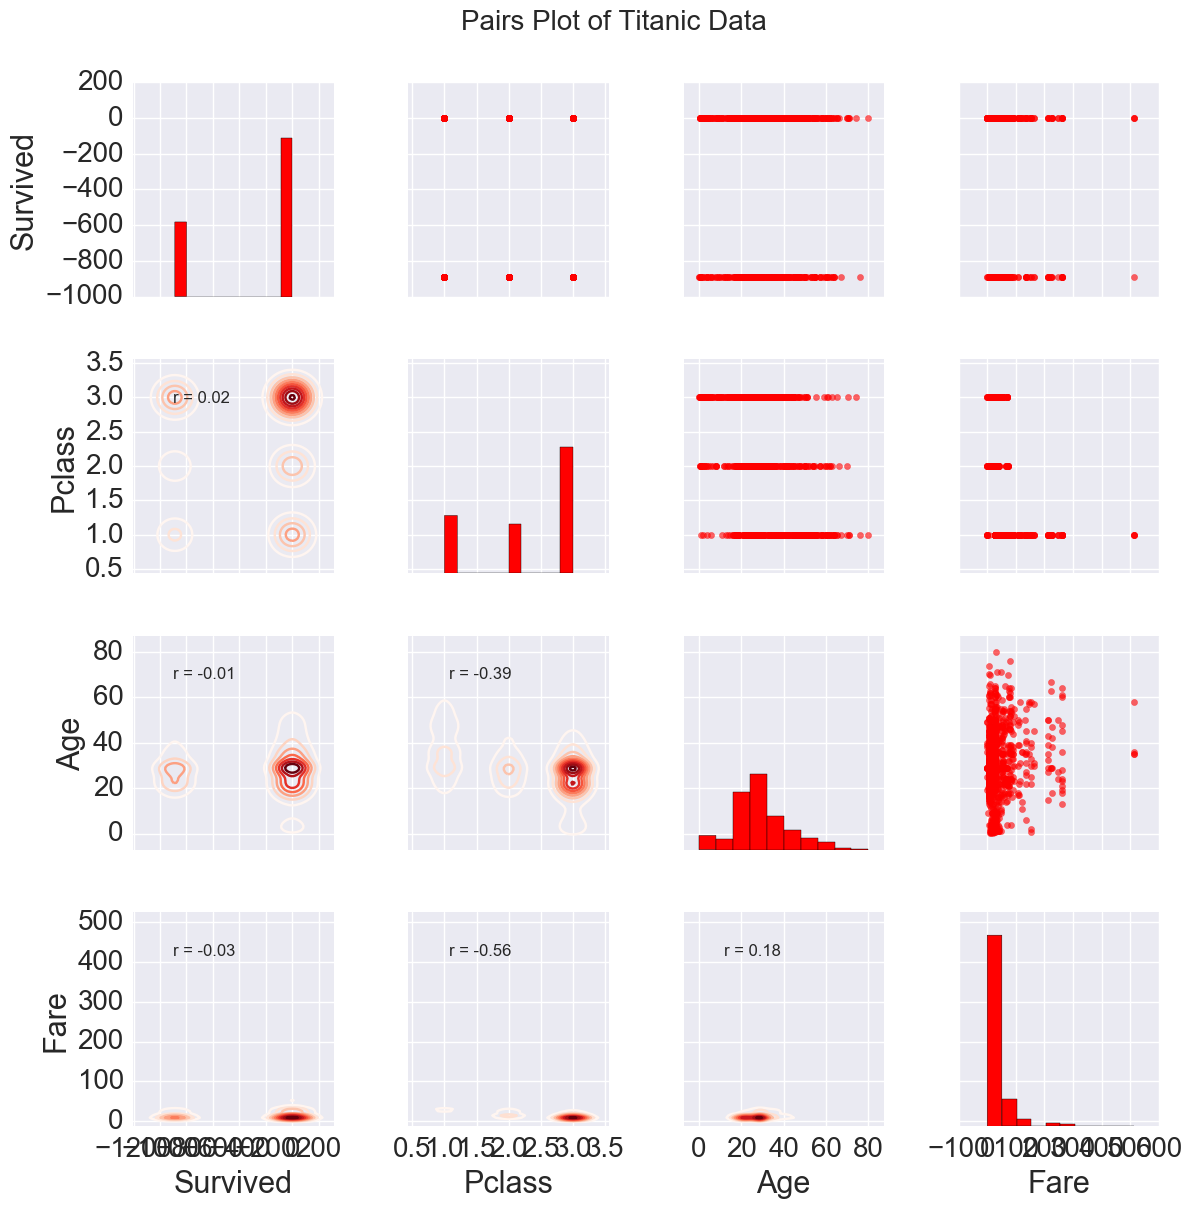

In [20]:
# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Extract the columns to  plot
plot_data = df[['Survived', 'Pclass', 'Age', 'Fare']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 12)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Titanic Data', size = 20, y = 1.02);

## Training time

In [132]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Separate out the features and targets
features = train_df.drop('Survived',axis=1)
targets = pd.DataFrame(train_df['Survived'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.15, random_state = 42)

In [133]:
# apply a model
from sklearn.ensemble import RandomForestClassifier
# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=-1, random_state=2)

# Train the Classifier to take the training features and learn how they relate
# to the training y
clf.fit(X, y)

# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
prediction = clf.predict(X_test)

/Users/kselvadurai/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [134]:
print('score for random forest: {0:.2f}'.format(clf.score(X_test,y_test)))

score for random forest: 0.84


In [141]:
# Hyperparam opt
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[120],'max_depth':[8],'min_samples_split':[2]}
g_search_clf = GridSearchCV(clf,param_grid=parameters,cv=3)
g_search_clf.fit(X,y)
g_search_clf.best_score_ # check score

/Users/kselvadurai/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/kselvadurai/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/kselvadurai/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/kselvadurai/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=2, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [120], 'max_depth': [8], 'min_samples_split': [2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [142]:
g_search_clf.best_score_

0.82959048877146635

In [143]:
# get submission file
def get_submission_file(model,filename):
    # convert to matrix
    test_X = test_df.as_matrix().astype('float')
    # make predictions
    predictions = model.predict(test_X)
    # submission dataframe
    df_submission = pd.DataFrame({'PassengerId': test_df.index,'Survived': predictions})
    # submission file
    submission_data_path = os.path.join(os.path.pardir,'data','external')
    submission_file_path = os.path.join(submission_data_path,filename)
    # write to file
    df_submission.to_csv(submission_file_path,index=False)

# evaluate model
print('score for random forest classifier: {0:.2f}'.format(clf.score(X_test,y_test)))
get_submission_file(clf,'tds_rfc.csv')

score for random forest classifier: 0.84


ValueError: could not convert string to float: 'C'